# Proteogenomics of breast cancer






## 1. Data read  and cleaning 


In [586]:
# Import libraries necessary for this project
%matplotlib inline
%pylab inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd 
import numpy as np
import os as os



import matplotlib.pyplot as pl
from IPython.display import display 
import visuals2 as vs1



In [145]:
#data read 


# Load the clinical and expression data as well as the mapping proteins data set 
try:
    clinical_data = pd.read_csv("clinical_data_breast_cancer.csv")  
    expression_data=pd.read_csv("77_cancer_proteomes_CPTAC_itraq.csv")
    mapping_proteins=pd.read_csv("PAM50_proteins.csv")

    print(" Clinical data has {} samples with {} features each.".format(*clinical_data.shape))
    print(" Expression data has {} samples with {} features each.".format(*expression_data.shape))
    print(" Protein mapping data has {} samples with {} features each.".format(*mapping_proteins.shape))

except:
    print("One or more datasets could not be loaded. Is the dataset missing?")

 Clinical data has 105 samples with 30 features each.
 Expression data has 12553 samples with 86 features each.
 Protein mapping data has 100 samples with 4 features each.


In [146]:
display(clinical_data.head(n=1))

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2


In [147]:
display(expression_data.head(n=1))

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.49406,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.65585,-0.552212,-0.39856,0.598585,-0.191285,0.566975


In [148]:
display(mapping_proteins.head(n=1))

,GeneSymbol,RefSeqProteinID,Species,Gene Name
0,MIA,NP_006524,Homo sapiens,melanoma inhibitory activity


In [149]:
#cleanup column names  clinical data and mapping proteins 
clinical_data.columns =clinical_data.columns.str.replace(' |-', '_')
clinical_data.columns = map(str.lower, clinical_data.columns)
mapping_proteins.columns=map(str.lower, mapping_proteins.columns)
mapping_proteins.columns=mapping_proteins.columns.str.replace(' ','_')

In [150]:
display(clinical_data.head(n=1))

,complete_tcga_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,tumor__t1_coded,node,node_coded,...,pam50_mrna,sigclust_unsupervised_mrna,sigclust_intrinsic_mrna,mirna_clusters,methylation_clusters,rppa_clusters,cn_clusters,integrated_clusters_(with_pam50),integrated_clusters_(no_exp),integrated_clusters_(unsup_exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2


In [151]:
# rename id column 
mapping_proteins.rename(columns={'refseqproteinid':'RefSeq_accession_number'}, inplace=True)

## 2. Exploratory data analysis 

We have to prepare the two data sets for the different ML tasks . Initially we will use the expression data in a clustering task , trying to identify molecular signatures which we will then try to use aas predictors in the classification task. 

### 2.1 Descriptive analysis and feature engineering on the clinical dataset 

In [152]:
#Description of categorical variables 

      
print("Unique values in Gender: " + ', '.join(clinical_data['gender'].unique()))
print("Unique values in Estrogen response status: " + ', '.join(clinical_data['er_status'].unique()))
print("Unique values in Progesterone response status: " + ', '.join(clinical_data['pr_status'].unique()))
print("Unique values in human epidermal growth factor receptor 2 (HER2), final status: " + ', '.join(clinical_data['her2_final_status'].unique()))
print("Unique values in Tumor " + ', '.join(clinical_data['tumor'].unique()))
print("Unique values in Tumor T1 coded:" + ', '.join(clinical_data['tumor__t1_coded'].unique()))
print("Unique values in Tumor Node: " + ', '.join(clinical_data['node'].unique()))
print("Unique values in Node coded:  " + ', '.join(clinical_data['node_coded'].unique()))
print("Unique values in PAM50 mRNA: " + ', '.join(clinical_data['pam50_mrna'].unique()))
print("Unique values in Metastasis:  " + ', '.join(clinical_data['metastasis'].unique()))
print("Unique values in Metastasis Coded: " + ', '.join(clinical_data['metastasis_coded'].unique()))
print("Unique values in Breast Cancer stage:  " + ', '.join(clinical_data['ajcc_stage'].unique()))
print("Unique values in converted breast cancer stage:  " + ', '.join(clinical_data['converted_stage'].unique()))
print("Unique values in Vital status: " + ', '.join(clinical_data['vital_status'].unique()))
print("Unique values in RPAA clusters: " + ', '.join(clinical_data['rppa_clusters'].unique()))

Unique values in Gender: FEMALE, MALE
Unique values in Estrogen response status: Negative, Indeterminate, Positive
Unique values in Progesterone response status: Negative, Positive
Unique values in human epidermal growth factor receptor 2 (HER2), final status: Negative, Positive, Equivocal
Unique values in Tumor T3, T2, T1, T4
Unique values in Tumor T1 coded:T_Other, T1
Unique values in Tumor Node: N3, N0, N1, N2
Unique values in Node coded:  Positive, Negative
Unique values in PAM50 mRNA: Basal-like, HER2-enriched, Luminal A, Luminal B
Unique values in Metastasis:  M1, M0
Unique values in Metastasis Coded: Positive, Negative
Unique values in Breast Cancer stage:  Stage IV, Stage IIA, Stage IIB, Stage IIIC, Stage IA, Stage IIIA, Stage IIIB, Stage II, Stage I, Stage III, Stage IB
Unique values in converted breast cancer stage:  No_Conversion, Stage IIA, Stage IIB, Stage I, Stage IIIA, Stage IIIC, Stage IIIB
Unique values in Vital status: DECEASED, LIVING
Unique values in RPAA clusters: 

In [153]:
# we keep the metastasis coded feature and the tumor size grouping in the tumor column
clinical_final=clinical_data.drop(["metastasis","tumor__t1_coded"], axis=1) 

#creating a molecular data frame, with all the molecular data to be added to the expression data 
colNames = clinical_final.columns[clinical_final.columns.str.contains(pat = 'clust|tcga')] 


In [154]:

print(colNames)
molecular_df=clinical_final[colNames]
molecular_df=molecular_df.drop(["rppa_clusters"], axis=1) # drop rppa clusters which are the same as the predictor in the clinical data 


molecular_df.reset_index()
display(molecular_df.head(n=5))
colNames=molecular_df.columns

Index(['complete_tcga_id', 'sigclust_unsupervised_mrna',
       'sigclust_intrinsic_mrna', 'mirna_clusters', 'methylation_clusters',
       'rppa_clusters', 'cn_clusters', 'integrated_clusters_(with_pam50)',
       'integrated_clusters_(no_exp)', 'integrated_clusters_(unsup_exp)'],
      dtype='object')


,complete_tcga_id,sigclust_unsupervised_mrna,sigclust_intrinsic_mrna,mirna_clusters,methylation_clusters,cn_clusters,integrated_clusters_(with_pam50),integrated_clusters_(no_exp),integrated_clusters_(unsup_exp)
0,TCGA-A2-A0T2,0,-13,3,5,3,2,2,2
1,TCGA-A2-A0CM,-12,-13,4,4,4,2,1,1
2,TCGA-BH-A18V,-12,-13,5,5,1,2,2,2
3,TCGA-BH-A18Q,-12,-13,5,5,1,2,2,2
4,TCGA-BH-A0E0,0,-13,5,5,1,2,2,2


In [155]:
clustColNames=colNames.values
clustColNames=np.delete(clustColNames,0)

/Users/andra/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


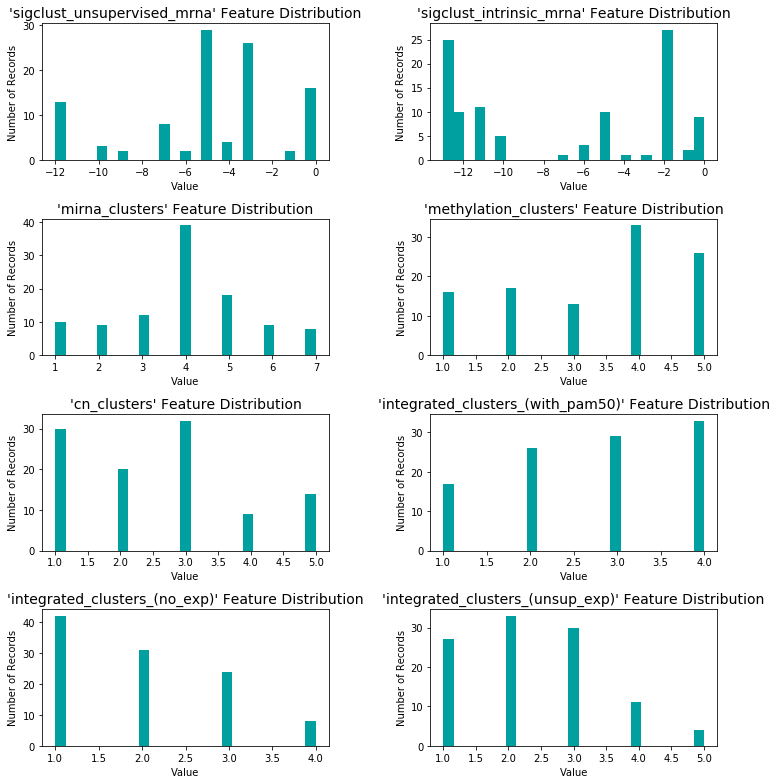

In [156]:

#molecular data frame data , overview of distribution 

fig = pl.figure(figsize = (11,11));

# age and contact info plotting 
for i, feature in enumerate(clustColNames ):
        ax = fig.add_subplot(4, 2, i+1)
        ax.hist(molecular_df[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        
fig.tight_layout()
fig.show()

In [157]:
clinical_final= clinical_final.drop(clustColNames, axis=1)
display(clinical_final.head(n=5))

,complete_tcga_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,node,node_coded,metastasis_coded,ajcc_stage,converted_stage,survival_data_form,vital_status,days_to_date_of_last_contact,days_to_date_of_death,os_event,os_time,pam50_mrna,rppa_clusters
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,N3,Positive,Positive,Stage IV,No_Conversion,followup,DECEASED,240,240.0,1,240,Basal-like,Basal
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,N0,Negative,Negative,Stage IIA,Stage IIA,followup,DECEASED,754,754.0,1,754,Basal-like,Basal
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,N1,Positive,Negative,Stage IIB,No_Conversion,enrollment,DECEASED,1555,1555.0,1,1555,Basal-like,Basal
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,N1,Positive,Negative,Stage IIB,No_Conversion,enrollment,DECEASED,1692,1692.0,1,1692,Basal-like,Basal
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,N3,Positive,Negative,Stage IIIC,No_Conversion,followup,LIVING,133,NaN,0,133,Basal-like,Basal


Text(0.5, 1.0, 'Occurences of cancer type based on mRNA PAM50')

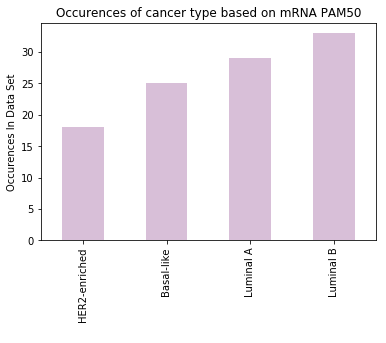

In [158]:
#For the classification task, we will try to predict the cancer subtype, described by the pam50 column 
target_counts= clinical_final['pam50_mrna'].value_counts(ascending=True)

target_counts =  target_counts.plot(kind='bar', color = '#D8BFD8')
target_counts.set_xlabel(" ")
target_counts.set_ylabel("Occurences In Data Set")
target_counts.set_title("Occurences of cancer type based on mRNA PAM50")


In [159]:
clinical_final.describe() # numerical 

,age_at_initial_pathologic_diagnosis,days_to_date_of_last_contact,days_to_date_of_death,os_event,os_time
count,105.000000,105.000000,11.000000,105.000000,105.000000
mean,58.685714,788.390476,1254.454545,0.104762,817.647619
std,13.066630,645.283040,678.050642,0.307715,672.026613
min,30.000000,0.000000,160.000000,0.000000,0.000000
25%,49.000000,240.000000,947.500000,0.000000,240.000000
50%,58.000000,643.000000,1364.000000,0.000000,665.000000
75%,67.000000,1288.000000,1627.500000,0.000000,1305.000000
max,88.000000,2850.000000,2483.000000,1.000000,2850.000000


/Users/andra/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/andra/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/andra/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


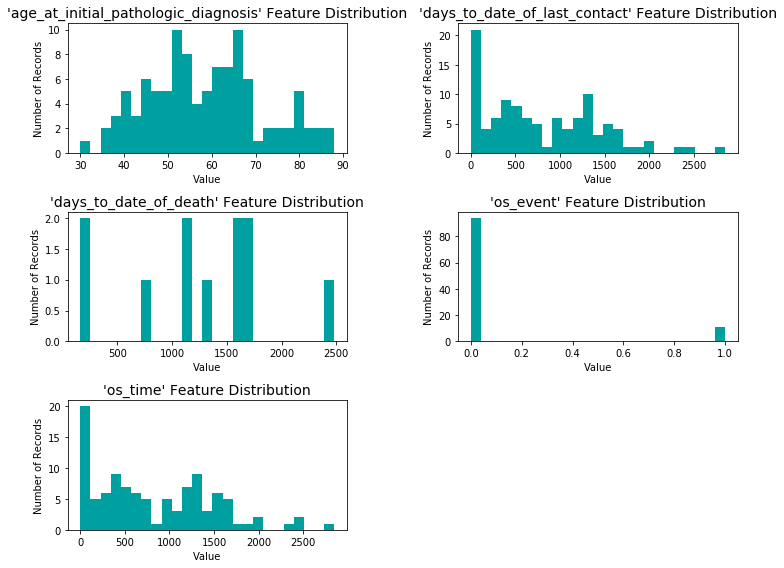

In [160]:
fig = pl.figure(figsize = (11,8));


# age and contact info plotting 
for i, feature in enumerate(['age_at_initial_pathologic_diagnosis','days_to_date_of_last_contact','days_to_date_of_death','os_event','os_time']):
        ax = fig.add_subplot(3, 2, i+1)
        ax.hist(clinical_final[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        
fig.tight_layout()
fig.show()



https://www.cancer.gov/publications/dictionaries/cancer-terms/def/os

Overall survival 
Os event - whether a treatment has been registered 
Os time - time since 


Overall survival (OS)
* OS event - whether a treatment has been registered 
* OS time - The length of time from either the date of diagnosis or the start of treatment for a disease, such as cancer, that patients diagnosed with the disease are still alive.The length of time from either the date of diagnosis or the start of treatment for a disease, such as cancer, that patients diagnosed with the disease are still alive.fig.show()

Most patients do not have an os event registered so we will drop this column, while keeping the overall survival time.

In [161]:
clinical_final=clinical_final.drop(["os_event"], axis=1) 
display(clinical_final.head(n=4))

,complete_tcga_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,node,node_coded,metastasis_coded,ajcc_stage,converted_stage,survival_data_form,vital_status,days_to_date_of_last_contact,days_to_date_of_death,os_time,pam50_mrna,rppa_clusters
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,N3,Positive,Positive,Stage IV,No_Conversion,followup,DECEASED,240,240.0,240,Basal-like,Basal
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,N0,Negative,Negative,Stage IIA,Stage IIA,followup,DECEASED,754,754.0,754,Basal-like,Basal
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,N1,Positive,Negative,Stage IIB,No_Conversion,enrollment,DECEASED,1555,1555.0,1555,Basal-like,Basal
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,N1,Positive,Negative,Stage IIB,No_Conversion,enrollment,DECEASED,1692,1692.0,1692,Basal-like,Basal


In [162]:
# Log-transform the skewed features
cancer_type= clinical_final[['complete_tcga_id','pam50_mrna']]

features_raw = clinical_final.drop(['pam50_mrna'], axis = 1) # drop target and unique id 
skewed = ['days_to_date_of_last_contact', 'os_time','days_to_date_of_death']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

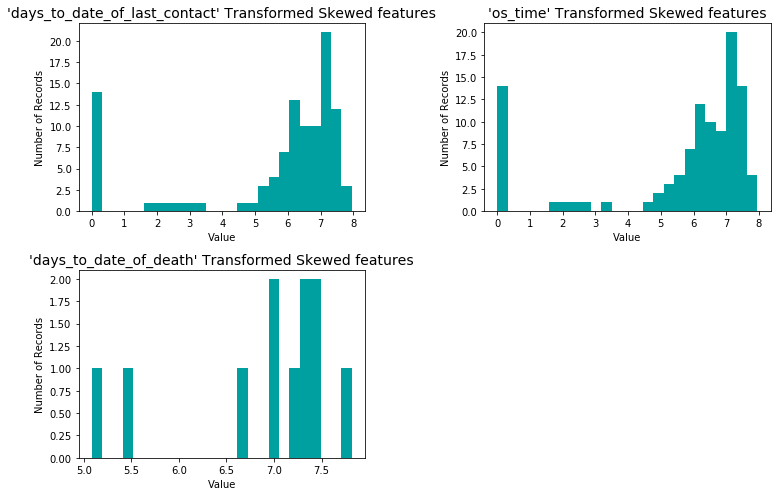

In [163]:
fig = pl.figure(figsize = (11,7));

# Overall survival plotting 
for i, feature in enumerate(['days_to_date_of_last_contact','os_time', 'days_to_date_of_death']):
        ax = fig.add_subplot(2, 2, i+1)
        ax.hist(features_log_transformed[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Transformed Skewed features"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        
fig.tight_layout()

In [164]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age_at_initial_pathologic_diagnosis'] 

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

/Users/andra/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,complete_tcga_id,gender,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,node,node_coded,metastasis_coded,ajcc_stage,converted_stage,survival_data_form,vital_status,days_to_date_of_last_contact,days_to_date_of_death,os_time,rppa_clusters
0,TCGA-A2-A0T2,FEMALE,0.620690,Negative,Negative,Negative,T3,N3,Positive,Positive,Stage IV,No_Conversion,followup,DECEASED,5.484797,5.484797,5.484797,Basal
1,TCGA-A2-A0CM,FEMALE,0.172414,Negative,Negative,Negative,T2,N0,Negative,Negative,Stage IIA,Stage IIA,followup,DECEASED,6.626718,6.626718,6.626718,Basal
2,TCGA-BH-A18V,FEMALE,0.310345,Negative,Negative,Negative,T2,N1,Positive,Negative,Stage IIB,No_Conversion,enrollment,DECEASED,7.349874,7.349874,7.349874,Basal
3,TCGA-BH-A18Q,FEMALE,0.448276,Negative,Negative,Negative,T2,N1,Positive,Negative,Stage IIB,No_Conversion,enrollment,DECEASED,7.434257,7.434257,7.434257,Basal
4,TCGA-BH-A0E0,FEMALE,0.137931,Negative,Negative,Negative,T3,N3,Positive,Negative,Stage IIIC,No_Conversion,followup,LIVING,4.897840,NaN,4.897840,Basal


In [177]:
df=features_log_minmax_transform

# dropping further features that are not relevant
# Node - we keep node code; N0 is always negative, N1-3 is always positive 
# we keep vital status and overall survival time for cancer overall survival markers and remove days of last contact 
#and day to death as they are not relevant for assessing cancer sub type 
# we also drop gender because breast cancer affects females predominantely and we only have 2 records for males 
df=df.drop(['gender','survival_data_form','days_to_date_of_last_contact','converted_stage','days_to_date_of_death','node'], axis = 1)

In [178]:
display(df.head(n=5))

,complete_tcga_id,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,node_coded,metastasis_coded,ajcc_stage,vital_status,os_time,rppa_clusters
0,TCGA-A2-A0T2,0.620690,Negative,Negative,Negative,T3,Positive,Positive,Stage IV,DECEASED,5.484797,Basal
1,TCGA-A2-A0CM,0.172414,Negative,Negative,Negative,T2,Negative,Negative,Stage IIA,DECEASED,6.626718,Basal
2,TCGA-BH-A18V,0.310345,Negative,Negative,Negative,T2,Positive,Negative,Stage IIB,DECEASED,7.349874,Basal
3,TCGA-BH-A18Q,0.448276,Negative,Negative,Negative,T2,Positive,Negative,Stage IIB,DECEASED,7.434257,Basal
4,TCGA-BH-A0E0,0.137931,Negative,Negative,Negative,T3,Positive,Negative,Stage IIIC,LIVING,4.897840,Basal


At this point we have transformed our relevant numerical features and most of the other ones have binary categories with a few exceptions. 

Text(0.5, 1.0, 'Occurences of cancer stages')

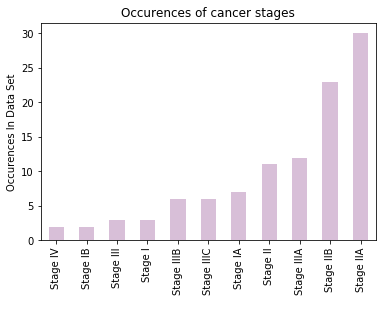

In [183]:


target_counts= df['ajcc_stage'].value_counts(ascending=True)

target_counts =  target_counts.plot(kind='bar', color = '#D8BFD8')
target_counts.set_xlabel(" ")
target_counts.set_ylabel("Occurences In Data Set")
target_counts.set_title("Occurences of cancer stages")



Text(0.5, 1.0, 'Occurences of cancer stages (transformed)')

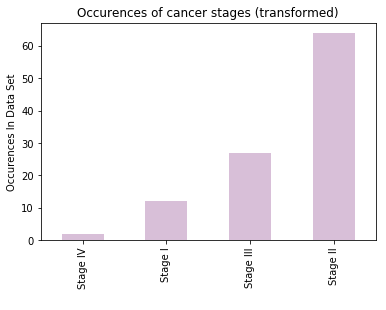

In [206]:
# transform the cancer stage variable 
import re

def clean_stages(x):
    replaced = re.sub('[ABC]', '', x)
    return (replaced)


df['ajcc_stage'] =df['ajcc_stage'].apply(lambda x: clean_stages(x))

target_counts= df['ajcc_stage'].value_counts(ascending=True)
target_counts =  target_counts.plot(kind='bar', color = '#D8BFD8')
target_counts.set_xlabel(" ")
target_counts.set_ylabel("Occurences In Data Set")
target_counts.set_title("Occurences of cancer stages (transformed)")



Text(0.5, 1.0, 'Occurences of rppa cluster types')

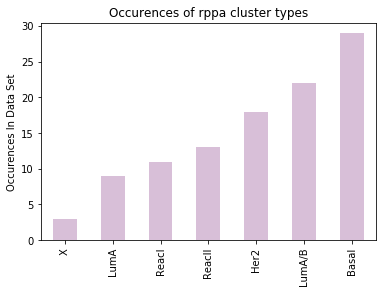

In [207]:

target_counts= df['rppa_clusters'].value_counts(ascending=True)

target_counts =  target_counts.plot(kind='bar', color = '#D8BFD8')
target_counts.set_xlabel(" ")
target_counts.set_ylabel("Occurences In Data Set")
target_counts.set_title("Occurences of rppa cluster types")



Text(0.5, 1.0, 'Occurences of tumor types')

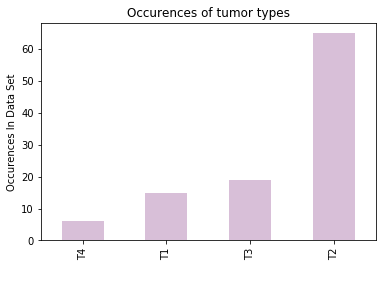

In [208]:

target_counts= df['tumor'].value_counts(ascending=True)

target_counts =  target_counts.plot(kind='bar', color = '#D8BFD8')
target_counts.set_xlabel(" ")
target_counts.set_ylabel("Occurences In Data Set")
target_counts.set_title("Occurences of tumor types")



### 2.2 Descriptive analysis and feature engineering on the expression data set 

In [50]:

#expression_data=pd.read_csv("77_cancer_proteomes_CPTAC_itraq.csv")
display(expression_data.head(n=5))

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
complete_tcga_id,,,,,,,,,,,,,,,,,,,,,
NP_958782 - plectin isoform 1 - PLEC,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
NP_958785 - plectin isoform 1g - NA,NP_958785,NA,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
NP_958786 - plectin isoform 1a - PLEC,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_000436 - plectin isoform 1c - NA,NP_000436,NA,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NP_958781 - plectin isoform 1e - NA,NP_958781,NA,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [51]:
expression_data['gene_symbol'].fillna("NA",inplace = True)

#create unique identifier using the available gene information to be used as column name 

expression_data['complete_tcga_id'] = expression_data['RefSeq_accession_number'] + " - " + expression_data['gene_name'].map(str) + " - " + \
                    expression_data['gene_symbol']
expression_data = expression_data.set_index('complete_tcga_id')

#remove extra gene information 
expression_data2 = expression_data.drop(['gene_name','gene_symbol','RefSeq_accession_number'],1)

# we aim to use the molecular signatures after the clustering in the classification model so we need to transpose the data
#so that it has unique ids as columns in order to be merged with the clinical data later on 

expression_data_3 = expression_data2.dropna(axis = 0)
expression_data_3 = expression_data2.transpose()

#expression_data_2['gene_symbol']


In [52]:

def id_mapping(x):
    y=x.replace("TCGA","")
    y="TCGA-"+y
    rest = y.split(".", 1)[0]
    return (rest)

expression_data_4=expression_data_3
expression_data_4.index = expression_data_4.index.to_series().apply(id_mapping)
display(expression_data_4.head(n=5))



complete_tcga_id,NP_958782 - plectin isoform 1 - PLEC,NP_958785 - plectin isoform 1g - NA,NP_958786 - plectin isoform 1a - PLEC,NP_000436 - plectin isoform 1c - NA,NP_958781 - plectin isoform 1e - NA,NP_958780 - plectin isoform 1f - PLEC,NP_958783 - plectin isoform 1d - PLEC,NP_958784 - plectin isoform 1b - NA,NP_112598 - epiplakin - NA,NP_001611 - neuroblast differentiation-associated protein AHNAK isoform 1 - AHNAK,...,NP_001193600 - protein RIC-3 isoform c precursor - NA,NP_061134 - basic leucine zipper transcriptional factor ATF-like 3 - BATF3,NP_932347 - sex comb on midleg-like protein 4 - SCML4,NP_003593 - peptidyl-prolyl cis-trans isomerase FKBP6 isoform a - FKBP6,NP_997203 - OTU domain-containing protein 6A - OTUD6A,NP_001191293 - protein FAM24B precursor - NA,NP_775791 - putative uncharacterized protein C9orf62 - NA,"NP_004065 - cytochrome c oxidase subunit 8A, mitochondrial - COX8A",NP_068752 - migration and invasion-inhibitory protein - MIIP,NP_219494 - uncharacterized protein KIAA1737 - KIAA1737
TCGA-AO-A12D,1.096131,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,-1.517390,0.482754,...,NaN,NaN,NaN,-0.340163,NaN,NaN,NaN,NaN,-0.633517,12.666488
TCGA-C8-A131,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,NaN,NaN,NaN,3.451902,NaN,NaN,NaN,NaN,4.840325,0.140736
TCGA-AO-A12B,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
TCGA-BH-A18Q,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
TCGA-C8-A130,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997


In [53]:
#display(expression_data_4.describe())

In [54]:
expression_data_4.index.value_counts().head() #duplicates 

TCGA-AO-A12D    2
TCGA-C8-A131    2
TCGA-AO-A12B    2
TCGA-A2-A0YG    1
TCGA-A2-A0YM    1
dtype: int64

In [55]:
expression_data_4 = expression_data_4.sort_index()

expression_data_4 = expression_data_4.loc[~expression_data_4.index.duplicated(keep='first')]#dropping duplicates indices

In [56]:
expression_data_4.index.value_counts().head() #viewing dropped indices 

TCGA-AO-A0JM     1
TCGA-BH-A18U     1
TCGA-A2-A0YG     1
TCGA-blcdb9-I    1
TCGA-c4155b-C    1
dtype: int64

In [57]:
expression_data_4.shape


(80, 12553)

In [58]:
missing_data_maps= expression_data_4.isnull().mean() * 100
missing_data_maps=pd.DataFrame(missing_data_maps)

In [59]:
#drop columns that have a high level of missing protein expression data 
expression_data_4.drop(missing_data_maps.loc[missing_data_maps[0] > 20].axes[0].tolist(), axis=1,inplace=True)

# impute protein data with median value data 
imputed=expression_data_4.fillna(expression_data_4.median())



In [60]:
# check how many PAM50 proteins are included in the expression data 
display(imputed.head(n=5))
display(mapping_proteins.head(n=5))

complete_tcga_id,NP_958782 - plectin isoform 1 - PLEC,NP_958785 - plectin isoform 1g - NA,NP_958786 - plectin isoform 1a - PLEC,NP_000436 - plectin isoform 1c - NA,NP_958781 - plectin isoform 1e - NA,NP_958780 - plectin isoform 1f - PLEC,NP_958783 - plectin isoform 1d - PLEC,NP_958784 - plectin isoform 1b - NA,NP_112598 - epiplakin - NA,NP_001611 - neuroblast differentiation-associated protein AHNAK isoform 1 - AHNAK,...,NP_002460 - myogenic factor 6 - MYF6,NP_001092808 - NUT family member 2A - FAM22A,NP_000610 - interferon gamma precursor - IFNG,NP_699178 - lysoplasmalogenase-like protein TMEM86A - TMEM86A,NP_006140 - galectin-4 - LGALS4,NP_068835 - urotensin-2 isoform a preproprotein - UTS2,NP_612382 - myeloid-associated differentiation marker - MYADM,NP_848561 - BPI fold-containing family A member 3 isoform 1 precursor - C20ORF71,NP_665813 - voltage-dependent calcium channel gamma-6 subunit isoform a - CACNG6,NP_001193600 - protein RIC-3 isoform c precursor - NA
TCGA-263d3f-I,0.598585,0.606697,0.603993,0.603993,0.603993,0.606697,0.603993,0.603993,-0.602132,2.778263,...,-0.429056,0.368718,-5.048028,-0.915833,3.584150,-2.865645,-0.814504,-0.577605,0.476942,-2.162522
TCGA-A2-A0CM,0.683404,0.694424,0.698098,0.687077,0.687077,0.698098,0.698098,0.698098,-2.652150,-0.984373,...,0.055601,1.212390,-0.381916,1.557701,3.335683,-0.910903,-0.954985,-0.841106,-1.101926,-1.065178
TCGA-A2-A0D2,0.107491,0.104164,0.107491,0.097512,0.104164,0.104164,0.104164,0.104164,-0.880454,-1.512473,...,0.669655,-0.245109,-2.074637,1.271736,2.229743,-0.211845,-0.018913,0.589821,3.230994,0.919136
TCGA-A2-A0EQ,-0.912670,-0.927979,-0.927979,-0.931806,-0.927979,-0.927979,-0.927979,-0.927979,-3.071151,-2.278943,...,-2.148822,1.211367,-2.229191,1.035321,1.383586,0.507182,-3.377319,-0.577605,-1.077235,-0.801685
TCGA-A2-A0EV,0.452986,0.472590,0.472590,0.458587,0.472590,0.472590,0.472590,0.472590,-0.742871,1.811277,...,-0.104334,-1.207770,-7.399899,0.702239,-1.546643,-0.681257,-1.020130,-1.832304,-0.504820,-4.966177


,genesymbol,RefSeq_accession_number,species,gene_name
0,MIA,NP_006524,Homo sapiens,melanoma inhibitory activity
1,FGFR4,NP_002002,Homo sapiens,fibroblast growth factor receptor 4
2,FGFR4,NP_998812,Homo sapiens,fibroblast growth factor receptor 4
3,FGFR4,NP_075252,Homo sapiens,fibroblast growth factor receptor 4
4,GPR160,NP_055188,Homo sapiens,G protein-coupled receptor 160


In [61]:
pam50refseq=mapping_proteins.RefSeq_accession_number.unique()
pam50_expr=imputed
print(pam50_expr.shape)

(80, 10062)


In [62]:
# keeping only the proteins which can be retrieved in the pam50 data set 
i=0
for (columnName, columnData) in imputed.items():
    x=columnName.split("-")[0].strip()
    if x not in pam50refseq: 
        pam50_expr.drop([columnName],1, inplace=True)
        i=i+1
print(i)
pam50_expr.shape

10027


(80, 35)

In [63]:
display(pam50_expr.head(n=5))


complete_tcga_id,NP_057427 - centromere protein F - CENPF,NP_002408 - antigen KI-67 isoform 1 - MKI67,"NP_000415 - keratin, type II cytoskeletal 5 - KRT5","NP_000413 - keratin, type I cytoskeletal 17 - NA","NP_000517 - keratin, type I cytoskeletal 14 - KRT14",NP_004439 - receptor tyrosine-protein kinase erbB-2 isoform a precursor - ERBB2,NP_005219 - epidermal growth factor receptor isoform a precursor - EGFR,NP_058519 - microtubule-associated protein tau isoform 1 - NA,NP_058518 - microtubule-associated protein tau isoform 3 - MAPT,NP_001116539 - microtubule-associated protein tau isoform 5 - MAPT,...,NP_003003 - secreted frizzled-related protein 1 precursor - SFRP1,NP_113611 - kinetochore protein Nuf2 - NUF2,NP_002002 - fibroblast growth factor receptor 4 isoform 1 precursor - FGFR4,NP_004487 - hepatocyte nuclear factor 3-alpha - FOXA1,NP_008950 - ubiquitin-conjugating enzyme E2 C isoform 1 - UBE2C,NP_114172 - G2/mitotic-specific cyclin-B1 - CCNB1,NP_001062 - thymidylate synthase - TYMS,NP_057547 - CXXC-type zinc finger protein 5 - CXXC5,NP_054895 - ubiquitin-conjugating enzyme E2 T - UBE2T,NP_001246 - cell division cycle protein 20 homolog - CDC20
TCGA-263d3f-I,-0.905015,-3.401099,2.897253,2.299599,2.405068,-1.951586,0.333562,-1.021301,-1.086205,-1.032118,...,5.720560,-0.010266,0.644558,0.855495,-1.472922,-2.254469,-3.425438,1.604590,-0.756278,-0.640522
TCGA-A2-A0CM,2.160157,2.623021,4.768355,0.639321,4.933663,-4.419112,-0.271711,-6.013418,-6.013418,-6.318320,...,0.286664,0.980958,1.509945,-4.433806,2.549550,2.733226,0.896468,-1.292949,3.541400,3.177722
TCGA-A2-A0D2,2.249702,3.576941,2.169868,2.968207,0.543251,-5.421010,-1.206443,-5.297932,-5.277974,-5.311238,...,7.053044,2.921637,3.743262,-6.269245,2.376105,2.781928,6.836827,-3.694601,2.495856,2.722053
TCGA-A2-A0EQ,-0.020957,1.884936,-7.407249,-7.675146,-5.187535,-2.795601,7.158672,-9.114133,-8.762041,-9.573385,...,-5.554936,0.047930,3.388984,0.063239,0.545453,-0.273546,1.460128,-1.410193,0.702364,-1.402538
TCGA-A2-A0EV,-1.364604,-2.246793,-3.750716,-3.882344,-2.252395,-3.252209,-1.574649,-2.190781,-2.871327,-2.190781,...,1.080321,-0.709263,-1.199369,-1.723081,-2.179579,-3.311022,0.139319,0.018893,-1.574649,-4.515280


In [65]:
#pam50_expr.shape
#expression_data_4.shape

imputed=expression_data_4.fillna(expression_data_4.median())

imputed.shape
display(pam50_expr.head(n=4))

complete_tcga_id,NP_057427 - centromere protein F - CENPF,NP_002408 - antigen KI-67 isoform 1 - MKI67,"NP_000415 - keratin, type II cytoskeletal 5 - KRT5","NP_000413 - keratin, type I cytoskeletal 17 - NA","NP_000517 - keratin, type I cytoskeletal 14 - KRT14",NP_004439 - receptor tyrosine-protein kinase erbB-2 isoform a precursor - ERBB2,NP_005219 - epidermal growth factor receptor isoform a precursor - EGFR,NP_058519 - microtubule-associated protein tau isoform 1 - NA,NP_058518 - microtubule-associated protein tau isoform 3 - MAPT,NP_001116539 - microtubule-associated protein tau isoform 5 - MAPT,...,NP_003003 - secreted frizzled-related protein 1 precursor - SFRP1,NP_113611 - kinetochore protein Nuf2 - NUF2,NP_002002 - fibroblast growth factor receptor 4 isoform 1 precursor - FGFR4,NP_004487 - hepatocyte nuclear factor 3-alpha - FOXA1,NP_008950 - ubiquitin-conjugating enzyme E2 C isoform 1 - UBE2C,NP_114172 - G2/mitotic-specific cyclin-B1 - CCNB1,NP_001062 - thymidylate synthase - TYMS,NP_057547 - CXXC-type zinc finger protein 5 - CXXC5,NP_054895 - ubiquitin-conjugating enzyme E2 T - UBE2T,NP_001246 - cell division cycle protein 20 homolog - CDC20
TCGA-263d3f-I,-0.905015,-3.401099,2.897253,2.299599,2.405068,-1.951586,0.333562,-1.021301,-1.086205,-1.032118,...,5.720560,-0.010266,0.644558,0.855495,-1.472922,-2.254469,-3.425438,1.604590,-0.756278,-0.640522
TCGA-A2-A0CM,2.160157,2.623021,4.768355,0.639321,4.933663,-4.419112,-0.271711,-6.013418,-6.013418,-6.318320,...,0.286664,0.980958,1.509945,-4.433806,2.549550,2.733226,0.896468,-1.292949,3.541400,3.177722
TCGA-A2-A0D2,2.249702,3.576941,2.169868,2.968207,0.543251,-5.421010,-1.206443,-5.297932,-5.277974,-5.311238,...,7.053044,2.921637,3.743262,-6.269245,2.376105,2.781928,6.836827,-3.694601,2.495856,2.722053
TCGA-A2-A0EQ,-0.020957,1.884936,-7.407249,-7.675146,-5.187535,-2.795601,7.158672,-9.114133,-8.762041,-9.573385,...,-5.554936,0.047930,3.388984,0.063239,0.545453,-0.273546,1.460128,-1.410193,0.702364,-1.402538


## 3. Clustering on the expression data set 

### 3.1 PAM50 relevant proteins

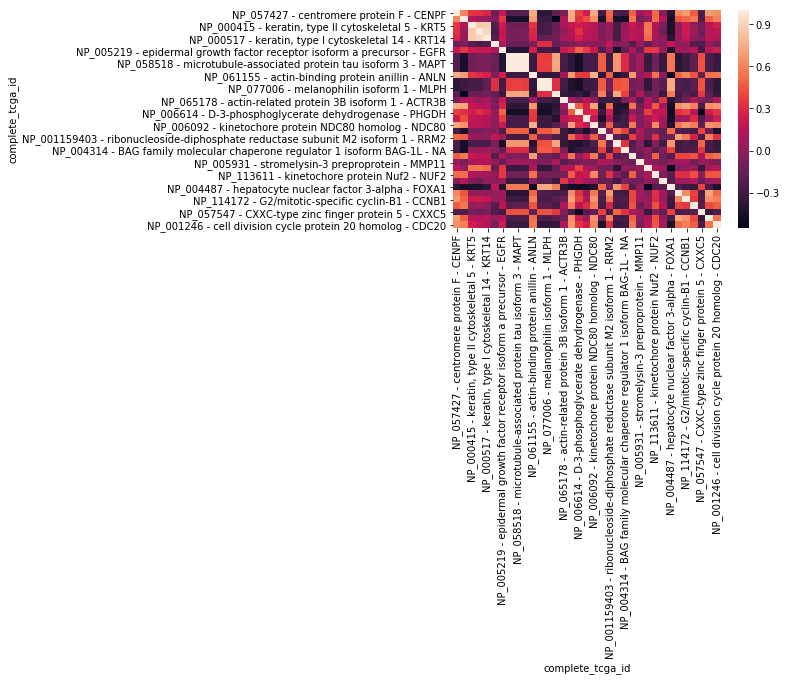

In [66]:
import seaborn as sb


pam50_expr.corr()
sb.heatmap(pam50_expr.corr())

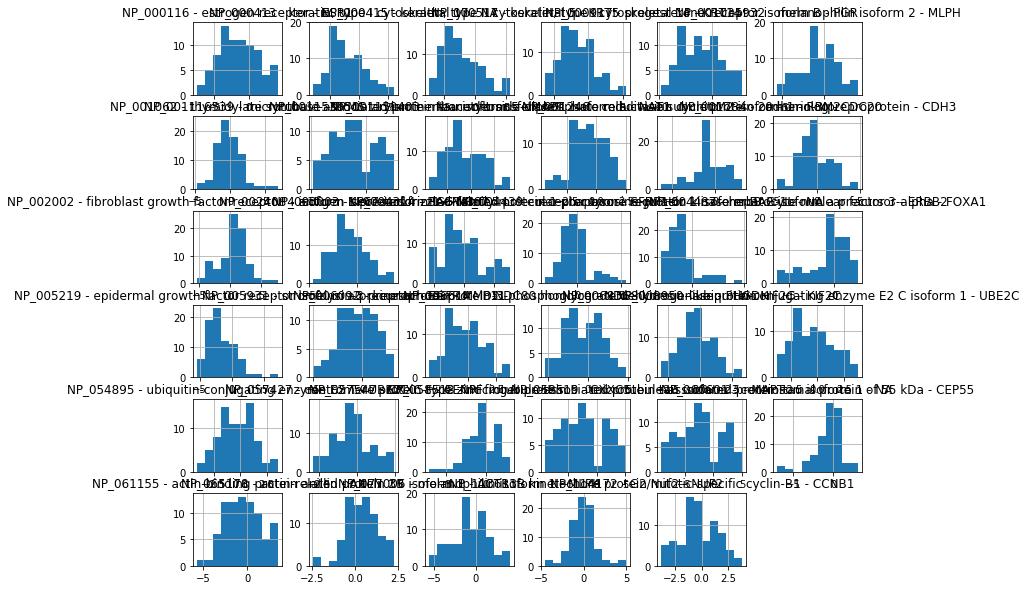

In [67]:
pam50_expr.hist(figsize=(12, 10));

In [68]:


molecular_df = molecular_df.set_index('complete_tcga_id')
display(molecular_df.head(n=5))

display(pam50_expr.head(n=5))

,sigclust_unsupervised_mrna,sigclust_intrinsic_mrna,mirna_clusters,methylation_clusters,cn_clusters,integrated_clusters_(with_pam50),integrated_clusters_(no_exp),integrated_clusters_(unsup_exp)
complete_tcga_id,,,,,,,,
TCGA-A2-A0T2,0,-13,3,5,3,2,2,2
TCGA-A2-A0CM,-12,-13,4,4,4,2,1,1
TCGA-BH-A18V,-12,-13,5,5,1,2,2,2
TCGA-BH-A18Q,-12,-13,5,5,1,2,2,2
TCGA-BH-A0E0,0,-13,5,5,1,2,2,2


complete_tcga_id,NP_057427 - centromere protein F - CENPF,NP_002408 - antigen KI-67 isoform 1 - MKI67,"NP_000415 - keratin, type II cytoskeletal 5 - KRT5","NP_000413 - keratin, type I cytoskeletal 17 - NA","NP_000517 - keratin, type I cytoskeletal 14 - KRT14",NP_004439 - receptor tyrosine-protein kinase erbB-2 isoform a precursor - ERBB2,NP_005219 - epidermal growth factor receptor isoform a precursor - EGFR,NP_058519 - microtubule-associated protein tau isoform 1 - NA,NP_058518 - microtubule-associated protein tau isoform 3 - MAPT,NP_001116539 - microtubule-associated protein tau isoform 5 - MAPT,...,NP_003003 - secreted frizzled-related protein 1 precursor - SFRP1,NP_113611 - kinetochore protein Nuf2 - NUF2,NP_002002 - fibroblast growth factor receptor 4 isoform 1 precursor - FGFR4,NP_004487 - hepatocyte nuclear factor 3-alpha - FOXA1,NP_008950 - ubiquitin-conjugating enzyme E2 C isoform 1 - UBE2C,NP_114172 - G2/mitotic-specific cyclin-B1 - CCNB1,NP_001062 - thymidylate synthase - TYMS,NP_057547 - CXXC-type zinc finger protein 5 - CXXC5,NP_054895 - ubiquitin-conjugating enzyme E2 T - UBE2T,NP_001246 - cell division cycle protein 20 homolog - CDC20
TCGA-263d3f-I,-0.905015,-3.401099,2.897253,2.299599,2.405068,-1.951586,0.333562,-1.021301,-1.086205,-1.032118,...,5.720560,-0.010266,0.644558,0.855495,-1.472922,-2.254469,-3.425438,1.604590,-0.756278,-0.640522
TCGA-A2-A0CM,2.160157,2.623021,4.768355,0.639321,4.933663,-4.419112,-0.271711,-6.013418,-6.013418,-6.318320,...,0.286664,0.980958,1.509945,-4.433806,2.549550,2.733226,0.896468,-1.292949,3.541400,3.177722
TCGA-A2-A0D2,2.249702,3.576941,2.169868,2.968207,0.543251,-5.421010,-1.206443,-5.297932,-5.277974,-5.311238,...,7.053044,2.921637,3.743262,-6.269245,2.376105,2.781928,6.836827,-3.694601,2.495856,2.722053
TCGA-A2-A0EQ,-0.020957,1.884936,-7.407249,-7.675146,-5.187535,-2.795601,7.158672,-9.114133,-8.762041,-9.573385,...,-5.554936,0.047930,3.388984,0.063239,0.545453,-0.273546,1.460128,-1.410193,0.702364,-1.402538
TCGA-A2-A0EV,-1.364604,-2.246793,-3.750716,-3.882344,-2.252395,-3.252209,-1.574649,-2.190781,-2.871327,-2.190781,...,1.080321,-0.709263,-1.199369,-1.723081,-2.179579,-3.311022,0.139319,0.018893,-1.574649,-4.515280


In [69]:


merged_pam50 = pd.concat([pam50_expr, molecular_df], axis=1, join='inner')
#display(merged_pam50.tail(n=5))

merged_all = pd.concat([imputed, molecular_df], axis=1, join='inner')

#merged_all.shape

display(merged_pam50.tail(n=5))



,NP_057427 - centromere protein F - CENPF,NP_002408 - antigen KI-67 isoform 1 - MKI67,"NP_000415 - keratin, type II cytoskeletal 5 - KRT5","NP_000413 - keratin, type I cytoskeletal 17 - NA","NP_000517 - keratin, type I cytoskeletal 14 - KRT14",NP_004439 - receptor tyrosine-protein kinase erbB-2 isoform a precursor - ERBB2,NP_005219 - epidermal growth factor receptor isoform a precursor - EGFR,NP_058519 - microtubule-associated protein tau isoform 1 - NA,NP_058518 - microtubule-associated protein tau isoform 3 - MAPT,NP_001116539 - microtubule-associated protein tau isoform 5 - MAPT,...,NP_054895 - ubiquitin-conjugating enzyme E2 T - UBE2T,NP_001246 - cell division cycle protein 20 homolog - CDC20,sigclust_unsupervised_mrna,sigclust_intrinsic_mrna,mirna_clusters,methylation_clusters,cn_clusters,integrated_clusters_(with_pam50),integrated_clusters_(no_exp),integrated_clusters_(unsup_exp)
TCGA-C8-A138,-0.409316,0.739026,0.943825,1.415596,1.806910,-0.504402,-2.625542,-5.284283,-4.907597,-5.309883,...,-0.295945,-2.307371,-5,-2,1,2,2,1,3,2
TCGA-D8-A142,-0.415696,-1.232627,-2.823113,1.724231,0.668726,-3.130366,-0.462687,-6.427009,-6.195666,-6.427009,...,-1.232627,-1.438667,0,-13,3,5,1,2,2,2
TCGA-E2-A154,-2.742664,-3.307172,-5.903908,-5.218972,-4.650701,-3.894260,-3.284592,2.861017,3.098110,2.981445,...,-2.772771,-6.268957,-3,-12,6,4,2,3,3,3
TCGA-E2-A158,-0.781777,-1.588474,-3.732945,0.701651,0.213150,-2.531862,-0.277591,-4.456732,-4.665129,-4.665129,...,-0.183476,-0.732478,0,-13,5,5,1,2,2,2
TCGA-E2-A15A,0.229658,-0.441373,-1.183981,-2.951031,-1.649230,-4.682292,-5.152014,-4.158888,-4.673345,-4.364671,...,0.140188,-2.655777,-5,-2,4,4,4,4,1,1


With very few exceptions, most of the data distributions are not skewed , so not further transformation is needed at this point. At the same time, considering that we kept all the relevant PAM50 proteins, we will not do PCA in this case. 

In [70]:
from sklearn.decomposition import PCA
# Apply PCA , ensuring that the components explain at least 80% of the variance in data 

pca = PCA(n_components=0.8).fit(merged_pam50)
reduced_data = pca.transform(merged_pam50)

reduced_data = pd.DataFrame(reduced_data)

display(reduced_data.head(n=5))

,0,1,2,3,4,5,6,7,8
0,16.698568,-6.179458,-6.176073,-1.646675,-1.053301,5.829104,0.271386,3.119147,3.105698
1,18.687097,-8.707609,-5.914208,-3.230280,-1.438870,4.381644,-4.257821,-2.988695,-1.268709
2,9.472921,14.938719,1.374566,-1.480265,0.307309,0.451698,-3.062276,2.306972,-4.624855
3,-4.837672,3.885557,1.253379,6.028322,-4.100318,-1.932558,-4.530099,-3.857755,-1.057162
4,-10.131031,-5.200370,1.008929,2.843785,-6.013721,2.654309,2.811020,-3.779747,-2.283331


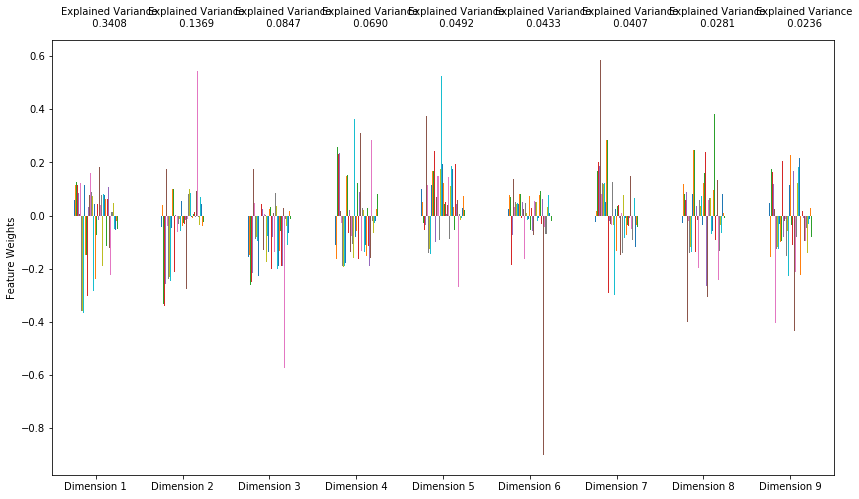

In [77]:
## Adapted from the visuals file 
# Generate PCA results plot
pca_results = vs1.pca_results(merged_pam50, pca)

In [78]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for n_clusters in range(2,20):
    clusterer = GaussianMixture(n_components=n_clusters).fit(reduced_data)
    preds = clusterer.predict(reduced_data)

    centers_trial = clusterer.means_

    sample_preds_trial = clusterer.predict(reduced_data)

    score = silhouette_score(reduced_data, preds)
    print("Number of clusters",n_clusters," Score ", round(score,3))
    


Number of clusters 2  Score  0.259
Number of clusters 3  Score  0.235
Number of clusters 4  Score  0.169
Number of clusters 5  Score  0.156
Number of clusters 6  Score  0.139
Number of clusters 7  Score  0.187
Number of clusters 8  Score  0.198
Number of clusters 9  Score  0.18
Number of clusters 10  Score  0.172
Number of clusters 11  Score  0.153
Number of clusters 12  Score  0.175
Number of clusters 13  Score  0.118
Number of clusters 14  Score  0.164
Number of clusters 15  Score  0.152
Number of clusters 16  Score  0.153
Number of clusters 17  Score  0.135
Number of clusters 18  Score  0.14
Number of clusters 19  Score  0.161


In [79]:
from sklearn.cluster import KMeans
from sklearn import metrics


for n_clusters in range(2,20):
    clusterer = KMeans(n_clusters=n_clusters, n_jobs=4)
    clusterer.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    score = metrics.silhouette_score(reduced_data, preds)
    print("Number of clusters",n_clusters," Score ", round(score,3))

Number of clusters 2  Score  0.269
Number of clusters 3  Score  0.231
Number of clusters 4  Score  0.194
Number of clusters 5  Score  0.176
Number of clusters 6  Score  0.201
Number of clusters 7  Score  0.199
Number of clusters 8  Score  0.198
Number of clusters 9  Score  0.196
Number of clusters 10  Score  0.202
Number of clusters 11  Score  0.178
Number of clusters 12  Score  0.172
Number of clusters 13  Score  0.177
Number of clusters 14  Score  0.186
Number of clusters 15  Score  0.202
Number of clusters 16  Score  0.172
Number of clusters 17  Score  0.193
Number of clusters 18  Score  0.181
Number of clusters 19  Score  0.175


In [80]:
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
from itertools import cycle

dampings=[0.5,0.6,0.7,0.8,0.9]
for n_damping in dampings:
    af = AffinityPropagation(affinity='euclidean',damping=n_damping,max_iter=1000).fit(reduced_data)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_

    n_clusters = len(cluster_centers_indices)
    score = metrics.silhouette_score(reduced_data, af.labels_)
    print("Damping", n_damping,"Number of clusters",n_clusters," Score: ", round(score,3))


Damping 0.5 Number of clusters 8  Score:  0.179
Damping 0.6 Number of clusters 8  Score:  0.179
Damping 0.7 Number of clusters 8  Score:  0.179
Damping 0.8 Number of clusters 7  Score:  0.167
Damping 0.9 Number of clusters 7  Score:  0.167


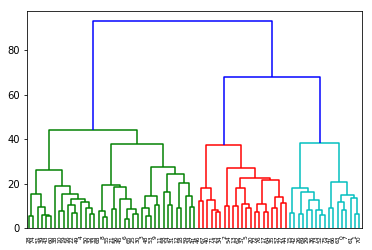

In [84]:
import scipy.cluster.hierarchy as hh
from sklearn.cluster import AgglomerativeClustering

dendrogram = hh.dendrogram(hh.linkage(reduced_data, method='ward'))
clusterer = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
fits = clusterer.fit_predict(reduced_data)

Winner model GMM - as the score between the 2 and 3 clusters scenario is more well defined. 

In [85]:
n_clusters=2
clusterer = GaussianMixture(n_components=n_clusters).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers_trial = clusterer.means_
score = silhouette_score(reduced_data, preds)
print("Number of clusters",n_clusters," Score ", round(score,3))
    

Number of clusters 2  Score  0.259


In [86]:
mol_sign_df=pd.DataFrame(merged_pam50.index)
mol_sign_df.columns=['complete_tcga_id']
mol_sign_df['signature']=preds

#display(merged_pam50.tail(n=3))

In [87]:
display(mol_sign_df.head(n=3)) # to be merged with the clinical data set 

,complete_tcga_id,signature
0,TCGA-A2-A0CM,1
1,TCGA-A2-A0D2,1
2,TCGA-A2-A0EQ,1


## 4. Classification of cancer subtype using expression data clusters 

In [255]:
# collecting all data in a final data frame 

mol_sign_df=mol_sign_df.set_index('complete_tcga_id')
df=df.set_index('complete_tcga_id')
cancer_type=cancer_type.set_index("complete_tcga_id")

final_df=pd.merge(mol_sign_df, df, left_index=True, right_index=True)
#display(final_df.head(n=5))

final_df=pd.merge(final_df, cancer_type, left_index=True, right_index=True)
#display(final_df.head(n=5))

final_df=final_df.reset_index()
#display(final_df.head(n=5))

final_features = final_df.drop(['pam50_mrna'], axis = 1) 
# drop also tcga id
final_features = final_features.drop(['complete_tcga_id'], axis = 1) 

display(final_features.head(n=3))

,signature,age_at_initial_pathologic_diagnosis,er_status,pr_status,her2_final_status,tumor,node_coded,metastasis_coded,ajcc_stage,vital_status,os_time,rppa_clusters
0,1,0.172414,Negative,Negative,Negative,T2,Negative,Negative,Stage II,DECEASED,6.626718,Basal
1,1,0.258621,Negative,Negative,Negative,T2,Negative,Negative,Stage II,LIVING,6.935370,Basal
2,1,0.586207,Negative,Negative,Positive,T2,Negative,Negative,Stage II,LIVING,7.794411,Basal


### One hot encoding on the final data set 

In [280]:
final_features2 = pd.get_dummies(final_features)
print("{} total features after one-hot encoding.".format(len(final_features2.columns)))

31 total features after one-hot encoding.


In [281]:
display(final_features2.head(n=3))

,signature,age_at_initial_pathologic_diagnosis,os_time,er_status_Negative,er_status_Positive,pr_status_Negative,pr_status_Positive,her2_final_status_Equivocal,her2_final_status_Negative,her2_final_status_Positive,...,ajcc_stage_Stage IV,vital_status_DECEASED,vital_status_LIVING,rppa_clusters_Basal,rppa_clusters_Her2,rppa_clusters_LumA,rppa_clusters_LumA/B,rppa_clusters_ReacI,rppa_clusters_ReacII,rppa_clusters_X
0,1,0.172414,6.626718,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,1,0.258621,6.935370,1,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2,1,0.586207,7.794411,1,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0


In [277]:
#target.unique()
target= final_df['pam50_mrna']
def target_mapping(x):
    y=None
    if (x=='Basal-like'): y="0"
    if (x=='HER2-enriched'): y='1'
    if (x=="Luminal A"): y='2'
    if (x=="Luminal B"): y='3'
    return (y)

#  Encode the 'pam50 mrna' data to numerical values
target = target.apply(lambda x: target_mapping(x))
print(target[1:6])

1    0
2    1
3    2
4    2
5    3
Name: pam50_mrna, dtype: object


### Shuffle data set

In [466]:
final_features3 = final_features2[final_features2.columns.drop(list(final_features2.filter(regex='rppa')))]
#final_features3 = final_features3[final_features3.columns.drop(list(final_features3.filter(regex='vital')))]
#final_features3 = final_features3[final_features3.columns.drop(list(final_features3.filter(regex='os_time')))]

display(final_features3.head(n=5))

,signature,age_at_initial_pathologic_diagnosis,os_time,er_status_Negative,er_status_Positive,pr_status_Negative,pr_status_Positive,her2_final_status_Equivocal,her2_final_status_Negative,her2_final_status_Positive,...,node_coded_Negative,node_coded_Positive,metastasis_coded_Negative,metastasis_coded_Positive,ajcc_stage_Stage I,ajcc_stage_Stage II,ajcc_stage_Stage III,ajcc_stage_Stage IV,vital_status_DECEASED,vital_status_LIVING
0,1,0.172414,6.626718,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
1,1,0.258621,6.935370,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
2,1,0.586207,7.794411,1,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
3,0,0.862069,6.876265,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
4,0,0.275862,6.309918,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1


In [561]:
# Import train_test_split

from sklearn.model_selection import train_test_split

#final_features3 = df[df.columns.drop(list(df.filter(regex='Test')))]


# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features3, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 61 samples.
Testing set has 16 samples.


### Benchmark model - dummy classifier 

In [562]:
from sklearn.dummy import DummyClassifier

# adapted from : https://www.geeksforgeeks.org/ml-dummy-classifiers-using-sklearn/

strategies = ['most_frequent', 'stratified', 'uniform']
  
test_scores = [] 
for s in strategies: 
    if s =='constant': 
        dclf = DummyClassifier(strategy = s, random_state = 0, constant ='M') 
    else: 
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train, y_train) 
    score = dclf.score(X_test, y_test) 
    test_scores.append(score) 

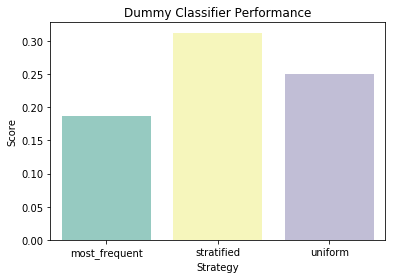

In [563]:
sb.set_palette("Set3")
barplot = sb.barplot(x = strategies, y = test_scores)
barplot.set(xlabel = "Strategy", ylabel = "Score", title = "Dummy Classifier Performance")
plt.show()

In [564]:
print("F score for winner model {} ".format(test_scores[1]))

F score for winner model 0.3125 


We select the Dummy Classifier with stratified strategy as our benchmark model with an F score = 0.3125

In [578]:
# scorer function 
# adapted from Udacity - Finding donors
from sklearn.metrics import fbeta_score, accuracy_score

def scorer( predictions_train, predictions_test, X_train, y_train, X_test, y_test): 

    results = {}
    results['acc_train'] = round(metrics.accuracy_score(y_train[:10], predictions_train[:10]),3)
    results['acc_test'] = round(metrics.accuracy_score(y_test, predictions_test),3)
    results['balanced_accuracy_test']=metrics.balanced_accuracy_score(y_test, predictions_test)
    results['f_beta_train'] = round(fbeta_score(y_train[:10],predictions_train[:10], average='macro', beta=0.5),3)
    results['f_beta_test'] = round(fbeta_score(y_test,predictions_test, average='macro', beta=0.5),6)
    results['f_1_train'] = round(metrics.f1_score(y_train[:10],predictions_train[:10], average='macro'),3)
    results['f_1_test'] = round(metrics.f1_score(y_test,predictions_test, average='macro'),3)

    # Return the results
    return results

### Classification models - non optimised

In [585]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


warnings.filterwarnings(action='once')

models=['Decision Tree',"Ada Boost","Logistic regression","Random Forrest","Naive Bayes", "XGBoost","SVM"]

model_results={}

for model in models: 
    print (model)
    
    if (model=='Decision Tree') : 
        clf= DecisionTreeClassifier( random_state=123)
        clf = clf.fit(X_train,y_train)
        predictions_train=clf.predict(X_train)
        predictions_test = clf.predict(X_test)
        score=scorer(predictions_train=predictions_train, predictions_test=predictions_test, X_train=X_train, y_train=y_train, X_test=X_test,y_test=y_test)
       # print(score)
        model_results[model]=score
        
    if (model=='Ada Boost') : 
        clf= AdaBoostClassifier(random_state=123)
        clf = clf.fit(X_train,y_train) 
        predictions_train=clf.predict(X_train)
        predictions_test = clf.predict(X_test)
        score=scorer(predictions_train=predictions_train, predictions_test=predictions_test, X_train=X_train, y_train=y_train, X_test=X_test,y_test=y_test)
      #  print (score)
        model_results[model]=score
    if (model=="Logistic regression"):
        clf= LogisticRegression(solver='lbfgs', random_state=123, multi_class='auto', max_iter=5000)
        clf = clf.fit(X_train,y_train)
        predictions_train=clf.predict(X_train)
        predictions_test = clf.predict(X_test)
        score=scorer(predictions_train=predictions_train, predictions_test=predictions_test, X_train=X_train, y_train=y_train, X_test=X_test,y_test=y_test)
      #  print (score)
        model_results[model]=score
        
    if (model=="Random Forrest"):
        clf= RandomForestClassifier(random_state=123)
        clf = clf.fit(X_train,y_train)
        predictions_train=clf.predict(X_train)
        predictions_test = clf.predict(X_test)
        score=scorer(predictions_train=predictions_train, predictions_test=predictions_test, X_train=X_train, y_train=y_train, X_test=X_test,y_test=y_test)
       # print (score)
        model_results[model]=score
    
    if (model=="Naive Bayes"):
        clf= GaussianNB()
        clf = clf.fit(X_train,y_train)
        predictions_train=clf.predict(X_train)
        predictions_test = clf.predict(X_test)
        score=scorer(predictions_train=predictions_train, predictions_test=predictions_test, X_train=X_train, y_train=y_train, X_test=X_test,y_test=y_test)
       # print (score)
        model_results[model]=score
        
    if (model=="XGBoost"):
        clf= GradientBoostingClassifier()
        clf = clf.fit(X_train,y_train)
        predictions_train=clf.predict(X_train)
        predictions_test = clf.predict(X_test)
        score=scorer(predictions_train=predictions_train, predictions_test=predictions_test, X_train=X_train, y_train=y_train, X_test=X_test,y_test=y_test)
       # print (score)
        model_results[model]=score
        
    if (model=="SVM"):
        clf= SVC(random_state=123)
        clf = clf.fit(X_train,y_train)
        predictions_train=clf.predict(X_train)
        predictions_test = clf.predict(X_test)
        score=scorer(predictions_train=predictions_train, predictions_test=predictions_test, X_train=X_train, y_train=y_train, X_test=X_test,y_test=y_test)
       # print (score)
        model_results[model]=score

pd.DataFrame(model_results)




Decision Tree
Ada Boost
Logistic regression
Random Forrest


/Users/andra/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/andra/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Naive Bayes
XGBoost
SVM


/Users/andra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,Decision Tree,Ada Boost,Logistic regression,Random Forrest,Naive Bayes,XGBoost,SVM
acc_test,0.750000,0.750000,0.625000,0.625000,0.625000,0.688000,0.250000
acc_train,1.000000,0.700000,0.800000,0.900000,0.800000,1.000000,0.800000
balanced_accuracy_test,0.809524,0.625000,0.601190,0.553571,0.553571,0.636905,0.312500
f_1_test,0.792000,0.623000,0.633000,0.583000,0.583000,0.667000,0.288000
f_1_train,1.000000,0.593000,0.875000,0.937000,0.806000,1.000000,0.867000
f_beta_test,0.793881,0.644504,0.673971,0.618590,0.618590,0.702694,0.276786
f_beta_train,1.000000,0.585000,0.875000,0.943000,0.806000,1.000000,0.887000
